## Camera on Car

![title](res/camera_mounter.jpeg)


- https://medium.com/udacity/challenge-1-3d-model-for-camera-mount-f5ffcc1655b5
- https://github.com/udacity/camera-mount

## Two Categories of Camera Calibration

### Photogrammetric Calibration (Used in Udacity)

Performed by observing a calibration object whose geometry in 3-D space is know with very good precision. Calibration can be done very efficiently. 

The calibration object usually consists of two or three planes orthogonal to each other. 

### Self-calibration

**Do not use any calibration object. Just by moving a camera in a static scene**, the rigidity of the scene provides in general two contrains on the cameras' internal parameters from one camera displacment by using camera information alone.  Therefore, if images are take by the same camera with fixed internal parameters, correspondences between **three images are sufficient** to recover both the internal and external parameters which allow us to reconstruct 3-D structure up to a similarity. While this approach is very flexible, it is not yet mature, because **many parameters need to estimate, we cannot always obtain reliable results**.


### Why do we need camera calibration?

Image distortion occurs when a camera looks at 3D object in the real world and transforms them into a 2D image. 

![title](res/3d_to_2d.PNG)


### Pinhole camera model

![title](res/pinhole.PNG)

The way how pinhole project from 3D to 2D is called camera matrix.

![title](res/camera_matrix.PNG)




## Type of Distortion

#### Type of Distortion: Radio Distortion

![title](res/radio_distortion.PNG)


#### Type of Distortion: Tangential Distortion

![title](res/tangential_distortion.PNG)

#### Type of Distortion: FishEye Distortion

![title](res/fisheye_distortion.PNG)






## Distortion Coefficient
![title](res/distortion_coefficient.PNG)

#### Radio Distortion: k1, K2, K3

(x,y) is a point in a distorted image. To undistort these points, OpenCv calculates r, which is the known distance between a point in an undistorted (corrected) image (x_corrected, y_corrected) and the center of the image distortion, which is often the center of that image (x_c, y_c). This center point (x_c, y_c) is sometimes referred to as the distortion center. 

Note: The distortion coefficient k3 is required to accurately reflect major radical distortion (like in wide lenses). However, for minor radial distortion, which is most regular camera lenses have, k3 has a value close to or equal to zero and is negligible, so in OpenCV, you can choose to ignore this coefficient. this is why it appears at the end of the distortion values array: [k1, k2, p1, p2, k3].

![title](res/correct_image.png)


#### Radio Distortion Correction

![title](res/radio_distortion_correction.PNG)

There are two more coefficients that account for tangential distortion: p1 and p2, and this distortion can be corrected using a different correction formula.

#### Tagential Distortion Correction
![title](res/tangential_distortion_correction.PNG)




- https://docs.opencv.org/master/dc/dbb/tutorial_py_calibration.html

In [1]:
import numpy as np
import cv2 as cv
import glob
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline


In [2]:
#termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [3]:
FILE_NAME = "calib_radial.jpg"
img = cv.imread(FILE_NAME)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [4]:
#Find the chess board corners
#cv2.findChessboardCorners(image, patternSize[, corners[, flags]]) → retval, corners
#patternSize: nx (rows), ny (columns)
ret, corners = cv.findChessboardCorners(gray, (7,6), None)

In [5]:
#prepare object points, like (0,0,0), (1,0,0), (2,0,0)..., (6,5,0)
objp = np.zeros((6*7, 3), np.float32)
objp[:,:2] = np.mgrid[0:7, 0:6].T.reshape(-1,2)

#Arrays to store object points and image points from all the images
objpoints = [] #3d point in real world space
imgpoints = [] #2d points in image plane


    

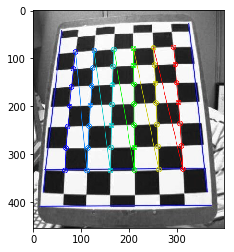

In [6]:
if ret == True:
    
    objpoints.append(objp)
    corners2 = cv.cornerSubPix(gray, corners, (11,11), (-1, -1), criteria)
    imgpoints.append(corners)

    cv.drawChessboardCorners(img, (7,6), corners2, ret)

    plt.imshow(img)
    plt.show()
    

### Calibration

#### cv2.calibrateCamera

- https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html

#### calibrateCamera

Finds the camera intrinsic and extrinsic parameters from several views of a calibration pattern.

**Python: cv2.calibrateCamera(objectPoints, imagePoints, imageSize[, cameraMatrix[, distCoeffs[, rvecs[, tvecs[, flags[, criteria]]]]]]) → retval, cameraMatrix, distCoeffs, rvecs, tvecs**

** Parameters:	**

* **objectPoints –**

In the new interface it is a vector of vectors of calibration pattern points in the calibration pattern coordinate space (e.g. std::vector<std::vector<cv::Vec3f>>). The outer vector contains as many elements as the number of the pattern views. If the same calibration pattern is shown in each view and it is fully visible, all the vectors will be the same. Although, it is possible to use partially occluded patterns, or even different patterns in different views. Then, the vectors will be different. The points are 3D, but since they are in a pattern coordinate system, then, if the rig is planar, it may make sense to put the model to a XY coordinate plane so that Z-coordinate of each input object point is 0.

In the old interface all the vectors of object points from different views are concatenated together.

* **imagePoints –**

In the new interface it is a vector of vectors of the projections of calibration pattern points (e.g. std::vector<std::vector<cv::Vec2f>>). imagePoints.size() and objectPoints.size() and imagePoints[i].size() must be equal to objectPoints[i].size() for each i.

In the old interface all the vectors of object points from different views are concatenated together.

* **point_counts –**

In the old interface this is a vector of integers, containing as many elements, as the number of views of the calibration pattern. Each element is the number of points in each view. Usually, all the elements are the same and equal to the number of feature points on the calibration pattern.
imageSize – Size of the image used only to initialize the intrinsic camera matrix.

* **cameraMatrix –** 

Output 3x3 floating-point camera matrix A = \vecthreethree{f_x}{0}{c_x}{0}{f_y}{c_y}{0}{0}{1} . If CV_CALIB_USE_INTRINSIC_GUESS and/or CV_CALIB_FIX_ASPECT_RATIO are specified, some or all of fx, fy, cx, cy must be initialized before calling the function.

* **distCoeffs –**

Output vector of distortion coefficients (k_1, k_2, p_1, p_2[, k_3[, k_4, k_5, k_6]]) of 4, 5, or 8 elements.
rvecs – Output vector of rotation vectors (see Rodrigues() ) estimated for each pattern view (e.g. std::vector<cv::Mat>>). That is, each k-th rotation vector together with the corresponding k-th translation vector (see the next output parameter description) brings the calibration pattern from the model coordinate space (in which object points are specified) to the world coordinate space, that is, a real position of the calibration pattern in the k-th pattern view (k=0.. M -1).
tvecs – Output vector of translation vectors estimated for each pattern view.

* **flags –**

Different flags that may be zero or a combination of the following values:

  * CV_CALIB_USE_INTRINSIC_GUESS cameraMatrix contains valid initial values of fx, fy, cx, cy that are optimized further. Otherwise, (cx, cy) is initially set to the image center ( imageSize is used), and focal distances are computed in a least-squares fashion. Note, that if intrinsic parameters are known, there is no need to use this function just to estimate extrinsic parameters. Use solvePnP() instead.
  * CV_CALIB_FIX_PRINCIPAL_POINT The principal point is not changed during the global optimization. It stays at the center or at a different location specified when CV_CALIB_USE_INTRINSIC_GUESS is set too.
  * CV_CALIB_FIX_ASPECT_RATIO The functions considers only fy as a free parameter. The ratio fx/fy stays the same as in the input cameraMatrix . When CV_CALIB_USE_INTRINSIC_GUESS is not set, the actual input values of fx and fy are ignored, only their ratio is computed and used further.
  * CV_CALIB_ZERO_TANGENT_DIST Tangential distortion coefficients (p_1, p_2) are set to zeros and stay zero.
  * CV_CALIB_FIX_K1,...,CV_CALIB_FIX_K6 The corresponding radial distortion coefficient is not changed during the optimization. If CV_CALIB_USE_INTRINSIC_GUESS is set, the coefficient from the supplied distCoeffs matrix is used. Otherwise, it is set to 0.
  * CV_CALIB_RATIONAL_MODEL Coefficients k4, k5, and k6 are enabled. To provide the backward compatibility, this extra flag should be explicitly specified to make the calibration function use the rational model and return 8 coefficients. If the flag is not set, the function computes and returns only 5 distortion coefficients.

* **criteria** – Termination criteria for the iterative optimization algorithm.
* **term_crit** – same as criteria.
The function estimates the intrinsic camera parameters and extrinsic parameters for each of the views. The algorithm is based on [Zhang2000] and [BouguetMCT]. The coordinates of 3D object points and their corresponding 2D projections in each view must be specified. That may be achieved by using an object with a known geometry and easily detectable feature points. Such an object is called a calibration rig or calibration pattern, and OpenCV has built-in support for a chessboard as a calibration rig (see findChessboardCorners() ). Currently, initialization of intrinsic parameters (when CV_CALIB_USE_INTRINSIC_GUESS is not set) is only implemented for planar calibration patterns (where Z-coordinates of the object points must be all zeros). 3D calibration rigs can also be used as long as initial cameraMatrix is provided.

**The algorithm performs the following steps:**

- Compute the initial intrinsic parameters (the option only available for planar calibration patterns) or read them from the input parameters. The distortion coefficients are all set to zeros initially unless some of CV_CALIB_FIX_K? are specified.

- Estimate the initial camera pose as if the intrinsic parameters have been already known. This is done using solvePnP() .

- Run the global Levenberg-Marquardt optimization algorithm to minimize the reprojection error, that is, the total sum of squared distances between the observed feature points imagePoints and the projected (using the current estimates for camera parameters and the poses) object points objectPoints. See projectPoints() for details.


The function returns the final re-projection error.

[Zhang2000]	
Zhang. A Flexible New Technique for Camera Calibration. IEEE Transactions on Pattern Analysis and Machine Intelligence, 22(11):1330-1334, 2000.

http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.220.534&rep=rep1&type=pdf

#### Notation

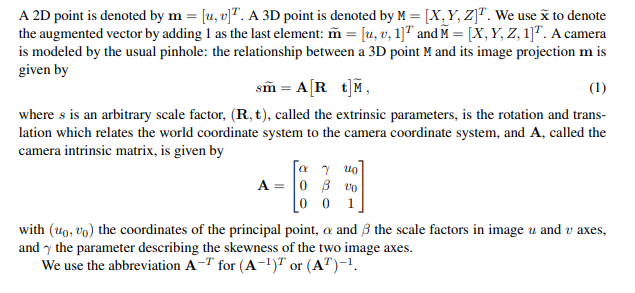



In [7]:
#Python: cv2.calibrateCamera(objectPoints, imagePoints, imageSize[, cameraMatrix[, distCoeffs[, rvecs[, tvecs[, flags[, criteria]]]]]]) → retval, cameraMatrix, distCoeffs, rvecs, tvecs¶
# mtx: matrix to transform 3D to 2D
# dist: distortion coefficient
# rvecs: rotation vector
# tvecs: transform vector
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

### Undistortion

In [8]:
img = cv.imread(FILE_NAME)
h, w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

#### Using cv.undistort

#### cv2.undistort

- https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html#void%20undistort(InputArray%20src,%20OutputArray%20dst,%20InputArray%20cameraMatrix,%20InputArray%20distCoeffs,%20InputArray%20newCameraMatrix)

The function transforms an image to compensate radial and tangential lens distortion.

Parameters:	

src – Input (distorted) image.

dst – Output (corrected) image that has the same size and type as src .

cameraMatrix – Input camera matrix A = \vecthreethree{f_x}{0}{c_x}{0}{f_y}{c_y}{0}{0}{1} .

distCoeffs – Input vector of distortion coefficients (k_1, k_2, p_1, p_2[, k_3[, k_4, k_5, k_6]]) of 4, 5, or 8 elements. If the vector is NULL/empty, the zero distortion coefficients are assumed.

newCameraMatrix – Camera matrix of the distorted image. By default, it is the same as cameraMatrix but you may additionally scale and shift the result by using a different matrix.

TODO: update it


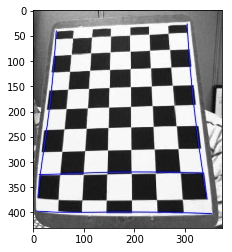

In [11]:
#undistort
dst = cv.undistort(img, mtx, dist, None, newcameramtx)

#crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]

plt.imshow(dst)
plt.show()

#### Using remapping

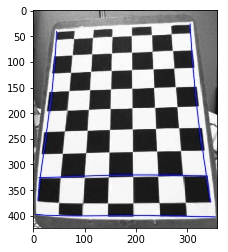

In [10]:
# undistort
mapx, mapy = cv.initUndistortRectifyMap(mtx, dist, None, newcameramtx, (w,h), 5)
dst = cv.remap(img, mapx, mapy, cv.INTER_LINEAR)

#crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]

plt.clf()
plt.imshow(dst)
plt.show()

### Camera Calibration with multiple images

Use multiple images, provide enough Z information

- https://github.com/udacity/CarND-Camera-Calibration/blob/master/camera_calibration.ipynb

In [ ]:
#TODO: algorithm in the picture
#TODO: Multiple cameras

### Further readings
[2018 Toyota Camry Camera Calibration — Advanced Driver Assist Systems (ADAS) ](https://www.youtube.com/watch?v=k01ekrtLYCE)
    